In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=0, vmax=8)
cmap = cm.rainbow

m = cm.ScalarMappable(norm=norm, cmap=cmap)

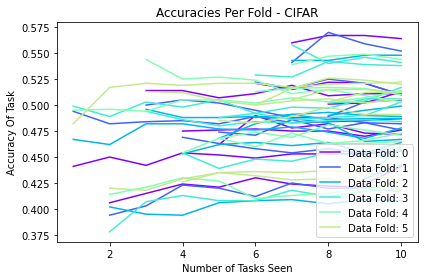

In [2]:
n_shifts = 6


for shift in range(n_shifts):
    df_of_split = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')
    
    for task_num in range(10):
        df_of_split_of_task = df_of_split[df_of_split['first_task'] == task_num]
        if task_num < 9:
            if task_num == 1:
                plt.plot(range(task_num + 1, 11), 
                         np.array(df_of_split_of_task['reverse_accuracy']),
                         c = m.to_rgba(shift),
                         label = "Data Fold: {}".format(shift)
                        )
            else:
                plt.plot(range(task_num + 1, 11), 
                         np.array(df_of_split_of_task['reverse_accuracy']),
                         c = m.to_rgba(shift)
                        )
    plt.title("Accuracies Per Fold - CIFAR")
    plt.ylabel("Accuracy Of Task")
    plt.xlabel("Number of Tasks Seen")
    plt.tight_layout()
    plt.legend(loc = "lower right")

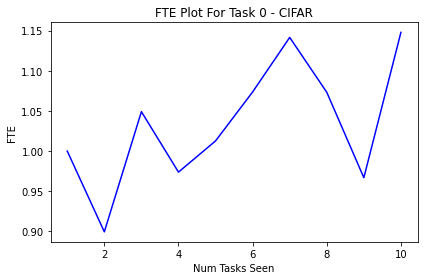

In [3]:
forward_accuracies_across_shifts = []
for shift in range(n_shifts):
    df_of_split = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')
    forward_accuracies = df_of_split[(df_of_split['first_task'] == 0)]['forward_accuracy']
    forward_accuracies_across_shifts.append(forward_accuracies)
mean_orig_error = 1 - np.mean(np.array(forward_accuracies_across_shifts)[:, 0], axis = 0)
mean_forward_errors = 1 - np.mean(forward_accuracies_across_shifts, axis = 0)    
ftes = mean_orig_error / mean_forward_errors

plt.title("FTE Plot For Task 0 - CIFAR")
plt.ylabel("FTE")
plt.xlabel("Num Tasks Seen")
plt.plot(range(1, 11), ftes, c = 'b')
plt.tight_layout()
plt.show()



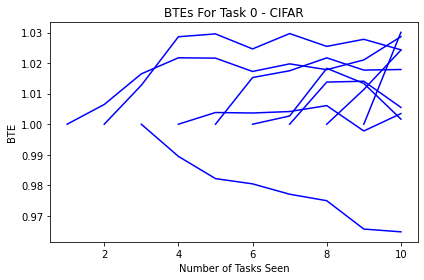

In [4]:
n_shifts = 6

btes_across_tasks_across_shifts = [[] for _ in range(n_shifts)]

for task_num in range(10):
    btes_across_shifts = []
    for shift in range(n_shifts):
        df_of_split = pickle.load(open('shift_{}.p'.format(shift), 'rb'), encoding = 'latin1')
        df_of_split_of_task = df_of_split[df_of_split['first_task'] == task_num]
        org_error = float(1 - df_of_split_of_task[df_of_split_of_task['last_task'] == task_num]['reverse_accuracy'])
        btes_across_shifts.append(org_error / (np.array((1 - df_of_split_of_task['reverse_accuracy']))))
    plt.plot(range(task_num + 1, 11), np.mean(btes_across_shifts, axis = 0), c = 'b')
        
    
plt.title("BTEs For Task 0 - CIFAR")
plt.ylabel("BTE")
plt.xlabel("Number of Tasks Seen")
plt.tight_layout()
plt.show()